In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Loading thr dataset and reading the first 5 rows
netflix=pd.read_csv('/content/sample_data/netflix_content_2023.csv')
netflix.head()

,Title,Available Globally?,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,Yes,2023-03-23,"81,21,00,000",English,Show
1,Ginny & Georgia: Season 2,Yes,2023-01-05,"66,51,00,000",English,Show
2,The Glory: Season 1 // 더 글로리: 시즌 1,Yes,2022-12-30,"62,28,00,000",Korean,Show
3,Wednesday: Season 1,Yes,2022-11-23,"50,77,00,000",English,Show
4,Queen Charlotte: A Bridgerton Story,Yes,2023-05-04,"50,30,00,000",English,Movie


In [106]:
#Clean the 'Hours Viewed' column
netflix['Hours Viewed'] =netflix['Hours Viewed'].replace(',', '', regex=True).astype(int)
netflix[['Title', 'Hours Viewed']].head()

,Title,Hours Viewed
0,The Night Agent: Season 1,812100000
1,Ginny & Georgia: Season 2,665100000
2,The Glory: Season 1 // 더 글로리: 시즌 1,622800000
3,Wednesday: Season 1,507700000
4,Queen Charlotte: A Bridgerton Story,503000000


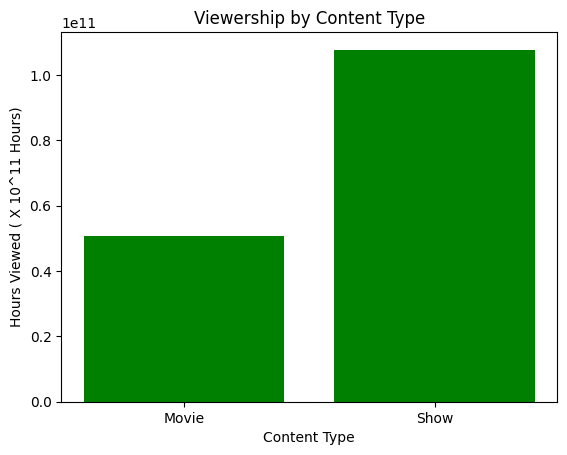

In [5]:
#Analyzing the viewership by Content Type
content_type_viewership = netflix.groupby('Content Type')['Hours Viewed'].sum()
plt.bar(content_type_viewership.index, content_type_viewership.values, color = "green")
plt.title("Viewership by Content Type")
plt.xlabel("Content Type")
plt.ylabel("Hours Viewed ( X 10^11 Hours)")
plt.show()
#Shows are watched approximatey 2 times more than Movies

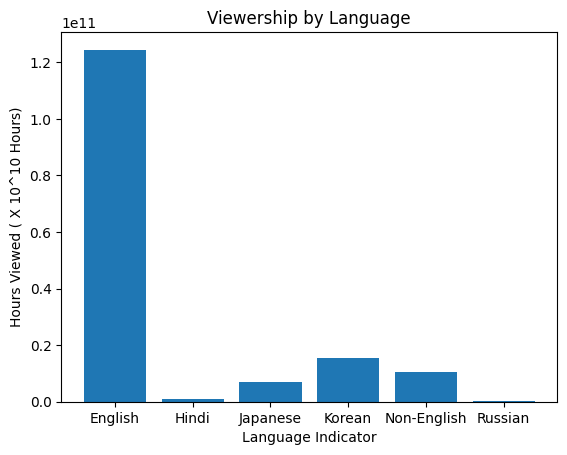

In [6]:
#Analyzing the viewership by Language Indicator
language_viewership = netflix.groupby('Language Indicator')['Hours Viewed'].sum()
plt.bar(language_viewership.index, language_viewership.values)
plt.title("Viewership by Language")
plt.xlabel("Language Indicator")
plt.ylabel("Hours Viewed ( X 10^10 Hours)")
plt.show()
#Content in English Language significantly dominates the viewership, followed by Korean Language

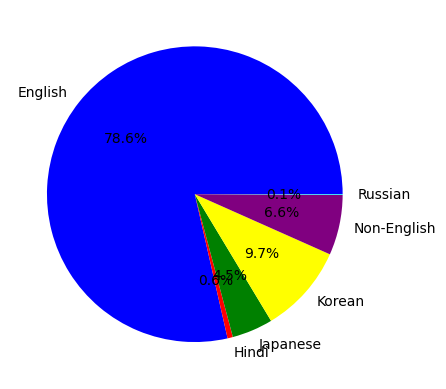

In [7]:
#Analyzing Viewship by Language indicator in proportion to each other
plt.pie(language_viewership.values, labels=language_viewership.index, colors = ['blue', 'red', 'green', 'yellow', 'purple', 'cyan'], autopct='%1.1f%%')
plt.show()
#Conclusion = 78.6% of total viewership comes from English language content

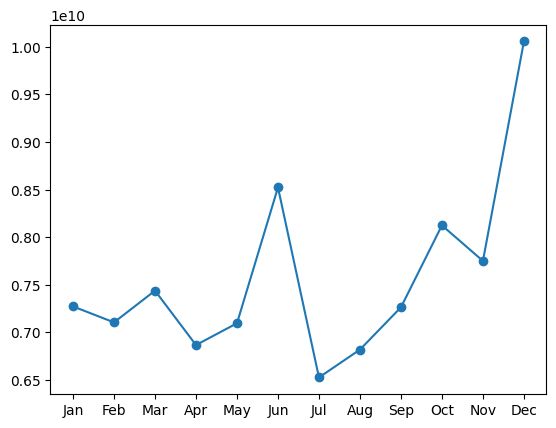

In [8]:
#Analyzing viewership based on release date to identify trends over time
labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
netflix['Release Date']=pd.to_datetime(netflix['Release Date'])
netflix['Release Month']=netflix['Release Date'].dt.month
monthly_viewership = netflix.groupby('Release Month')['Hours Viewed'].sum()
plt.plot(monthly_viewership.index, monthly_viewership.values, marker ='o')
plt.xticks(monthly_viewership.index, labels)
plt.show()
#Conclusion = The viewership is highest is summer and winter holidays i.e., in June and Decemer

In [9]:
#Most viewed 5 content on netflix
top_5 = netflix.nlargest(5, 'Hours Viewed')
top_5[['Title', 'Release Date', 'Hours Viewed', 'Language Indicator', 'Content Type']]

,Title,Release Date,Hours Viewed,Language Indicator,Content Type
0,The Night Agent: Season 1,2023-03-23,812100000,English,Show
1,Ginny & Georgia: Season 2,2023-01-05,665100000,English,Show
18227,King the Land: Limited Series // 킹더랜드: 리미티드 시리즈,2023-06-17,630200000,Korean,Movie
2,The Glory: Season 1 // 더 글로리: 시즌 1,2022-12-30,622800000,Korean,Show
18214,ONE PIECE: Season 1,2023-08-31,541900000,English,Show


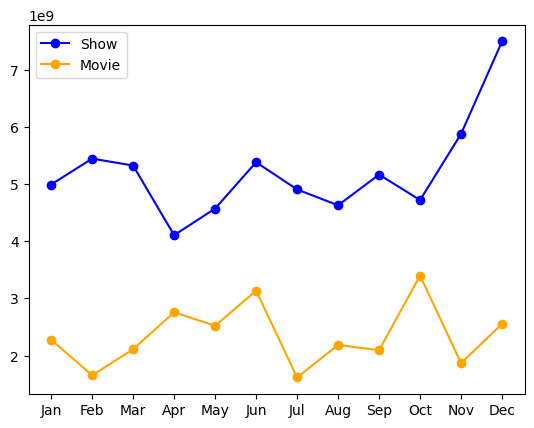

In [17]:
#Analyzing viewership based on Content Type and release Month to identify trends over time
labels= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
netflix_show=netflix[netflix['Content Type']=='Show']
monthly_viewership_show = netflix_show.groupby('Release Month')['Hours Viewed'].sum()
netflix_movie=netflix[netflix['Content Type']=='Movie']
monthly_viewership_movie = netflix_movie.groupby('Release Month')['Hours Viewed'].sum()

plt.plot(monthly_viewership_show.index, monthly_viewership_show.values, color ='blue', marker = 'o', label = 'Show')
plt.plot(monthly_viewership_show.index, monthly_viewership_movie.values, color ='orange', marker = 'o', label = 'Movie')
plt.xticks(monthly_viewership.index, labels)
plt.legend()
plt.show()

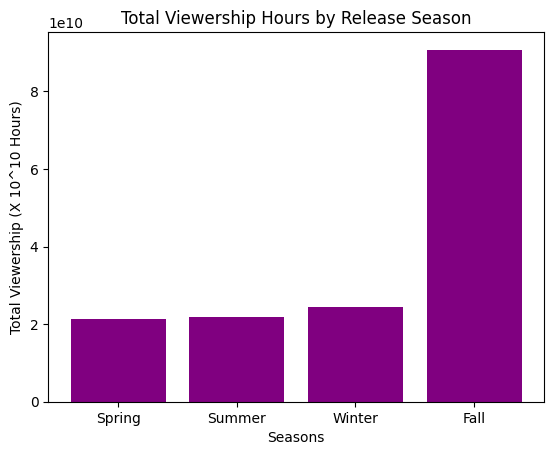

In [30]:
#Analyzing Viewership based on seasons as per release date
def get_season(month):
  if month in [12,1,2]:
    return 'Winter'
  elif month in [3,4,5]:
    return 'Spring'
  elif month in [6,7,8]:
    return 'Summer'
  else:
    return 'Fall'

netflix['Release Season']=netflix['Release Month'].apply(get_season)
viewership_by_season=netflix.groupby('Release Season')['Hours Viewed'].sum()
viewership_by_season=viewership_by_season.sort_values()
plt.bar(viewership_by_season.index, viewership_by_season.values, color='purple')
plt.title("Total Viewership Hours by Release Season")
plt.xlabel("Seasons")
plt.ylabel("Total Viewership (X 10^10 Hours)")
plt.show()

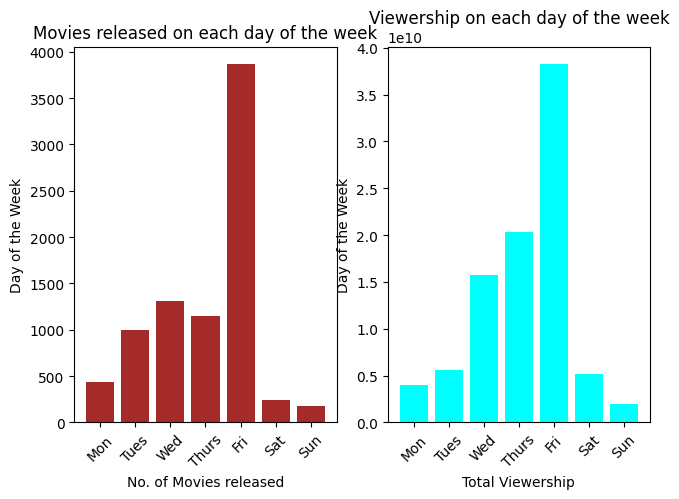

In [100]:
#Analyzing releases and viewsership by day of the week
labels=['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
netflix['Release Day']=netflix['Release Date'].dt.day_name()
releases_by_day = netflix['Release Day'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
viewership_by_day = netflix.groupby('Release Day')['Hours Viewed'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.subplot(1,2,1)
plt.bar(releases_by_day.index, releases_by_day.values, color="brown")
plt.xticks(releases_by_day.index, labels, rotation=45)
plt.title("Movies released on each day of the week")
plt.xlabel("No. of Movies released")
plt.ylabel("Day of the Week")

plt.subplot(1,2,2)
plt.bar(viewership_by_day.index, viewership_by_day.values, color="aqua")
plt.xticks(viewership_by_day.index, labels,rotation=45)
plt.title("Viewership on each day of the week")
plt.xlabel("Total Viewership")
plt.ylabel("Day of the Week")

plt.tight_layout(pad=0.0)
plt.show()
#Conclusion= the viewership is maximum on Friday. Hence, netflix releases content on friday only to maximize the consumption of content

In [110]:
#Analyzing the mean viewership of the content based on availibility
netflix.groupby('Available Globally?')['Hours Viewed'].mean()

,Hours Viewed
Available Globally?,
No,4.261677e+06
Yes,1.114549e+07
